# Ex 7.1 Visualizing a large Dataset
Below you will find a large(r) dataset with time series data of environmental sensors


Hint: Rooms with a '0' as second digit have a different orientation than rooms with a '1'

You might use you own dataset as well under the asumption:
* you have time series data
* you have at least three additional features that depend on time


## 0 Install required packages 
* for presentation mode in jupyter: Install Rise. After that, you can run a presentation directly from jupyter-notebook<br>
  In order to create slides you MUST run in jupyter-notebook mode. Jupyter-Lab is not (yet) supporting RISE. When in question look at the top line:<br>
  It should read something like *http://localhost:8888/tree/*
  
  Then:<br>
  * In the notebook menu go to  View -> Cell Toolbar -> Slideshow
  * This enables a dropdown menu in the very right corner of each cell of your notebook. <br>
    From the dropdown you can select the type of cell in your slideshow:<br>
    * Slide: A new topic/slide. This creates a new slide in your presentation following the previous slide to the right (when using the navigation buttons in the presentation).
    * Sub-Slide: This starts a new section within a topic. Sub-Slide cells are placed on a new slide underneath the previous slide.
    * Fragments: Additional information on a slide. Fragments appear on the same slide or sub-slide. This is the typical Powerpoint style animation.
    * Notes: Speaker notes. These appear in a separate browser window.
    * Skip: Cells will not appear in the presentation.
* For visualization and interactive diagrams install plotly<br> You will finde the documentation [here](https://plotly.com/python/)

In [1]:
import sys

#install rise if it is not installed
!conda install --yes --prefix {sys.prefix} -c conda-forge rise

#install plotly if it is not installed
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tadno\anaconda3

  added / updated specs:
    - rise


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.08.22~ --> conda-forge::ca-certificates-2023.11.17-h56e8100_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/win-64::certifi-2023.11.17-~ --> conda-forge/noarch::certifi-2023.11.17-pyhd8ed1ab_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tadno\anaconda3

  added / updated specs:
    - plotly


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.11.~ --> pkgs/main::ca-certificates-2023.08.22-haa95532_0 
  certifi            conda-forge/noarch::certifi-2023.11.1~ --> pkgs/main/win-64::certifi-2023.11.17-py310haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.graph_objects as go
import os

!{sys.executable} -m pip install fastparquet pyarrow

## 1 Load the data into a dataframe and convert the date strings

Hint, you might also find a parquet file. In that case, you can use the parquet file. It has the date already converted.

In [3]:
parquetFilename = r".\07092021bimsim_room.parquet"
filename = r".\07092021bimsim_room.parquet.csv"

isParquet = os.path.exists(parquetFilename)
if isParquet:
    %time df = pd.read_parquet(parquetFilename)
else:
    %time df = pd.read_csv(filename, sep=",")
df.head()

CPU times: total: 188 ms
Wall time: 242 ms


,source,datetime,id,celsius,pressure,humidity,sensor,room
0,0013A20041A94BE7,2021-03-21 01:46:22,1.616288e+09,18.772852,969.5412,33.374760,0013A20041A94BE7,H203
1,0013A20041A94BE7,2021-03-21 01:51:24,1.616288e+09,18.772852,969.5412,33.369170,0013A20041A94BE7,H203
2,0013A20041A94BE7,2021-03-21 01:56:27,1.616288e+09,18.767773,969.4889,33.704514,0013A20041A94BE7,H203
3,0013A20041A94BE7,2021-03-21 02:01:29,1.616288e+09,18.747656,969.5412,33.441830,0013A20041A94BE7,H203
4,0013A20041A94BE7,2021-03-21 02:06:31,1.616289e+09,18.742579,969.4889,33.508900,0013A20041A94BE7,H203


## 2 Remove duplicate or unused data to reduce total memory consumption

Domain knowledge:
* the columns "source" and "sensor" are identical
* "sensor" and "room" have a 1:1 mapping
* "id" contains the datetime as float
* some sensors might deliver negative temperatures <100°C. This is an errorneous measurement

As mentioned above we are going to remove `source` column, as it duplicates the `sensor` column. Moreover we also want to remove `sensor` column itself, because it maps the `room` column 1:1 and we are not going to need sensor name later in the task

In [4]:
data = df.copy()
data.drop(columns=['source', 'id'], inplace=True)
data.drop_duplicates(inplace=True)
data.loc[data['celsius'] < -100, 'celsius'] = np.nan
data.reset_index(drop=True, inplace=True)
data.head()

,datetime,celsius,pressure,humidity,sensor,room
0,2021-03-21 01:46:22,18.772852,969.5412,33.374760,0013A20041A94BE7,H203
1,2021-03-21 01:51:24,18.772852,969.5412,33.369170,0013A20041A94BE7,H203
2,2021-03-21 01:56:27,18.767773,969.4889,33.704514,0013A20041A94BE7,H203
3,2021-03-21 02:01:29,18.747656,969.5412,33.441830,0013A20041A94BE7,H203
4,2021-03-21 02:06:31,18.742579,969.4889,33.508900,0013A20041A94BE7,H203


As you can see there are some unrealistic negative values, which are also need to be handled

In [5]:
print('Amount of temperature values under -100°C:', data['celsius'].isna().sum())

Amount of temperature values under -100°C: 687


#### Now we want to perform the data preprocessing for the temperature values under -100°C
As the amount of rows is big, it is not the best solution to drop all of them, because we will lose some amount of significant information. Finding the mean values and replacing the NaN values with them can also cause evaluation of incorrect values, because the temperature is different based on the season and if we just take the mean value for each sensor, we would still have data degradation in our dataframe. Therefore, in this case the optimal solution would be to use `linear interpolation`, because data exhibits gradual changes between consecutive data points and the temperature doesn't change drastically in a short period of time.

In [6]:
data['celsius'].interpolate(inplace=True)
print('Amount of temperature values under -100°C:', data['celsius'].isna().sum())

Amount of temperature values under -100°C: 0


## 3 Visualize the data 

Perform Visualizations for different types of diagrams using either

1. matpolotlib/seaborn
2. plotly

**Important Hint**: Check the total volume of data points first. If needed create a digestible subset. Keep in mind, that visualizing large volumes of data points (i.e. > 10e5) can significantly slow down the notebook. Too many datapoints might even crash the browser, due to limited RAM availability for a browser tab in all common browsers.

We want to first check how many data points are there and if there are significant amount of data points, which can slow down the browser, we will create an aggregated values of the data points

In [7]:
data.shape

(1603788, 6)

Let's see, what we can show by visualizing the `Humidity`/`Pressure` relationship using a scatter plot

C:\Users\tadno\AppData\Local\Temp\ipykernel_21376\3700684736.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = aggregated_data.groupby(['datetime', 'date', 'room']).mean().reset_index()


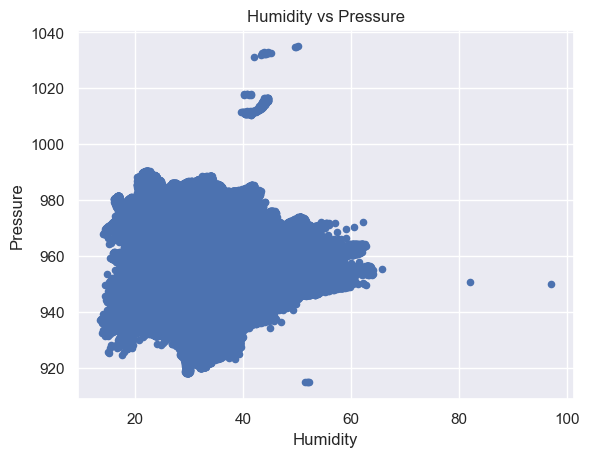

In [25]:
aggregated_data = data.copy()
aggregated_data['date'] = aggregated_data['datetime'].dt.date
aggregated_data = aggregated_data.groupby(['datetime', 'date', 'room']).mean().reset_index()
aggregated_data.plot(x='humidity', y='pressure', kind='scatter', title='Humidity vs Pressure')
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.show()

We can also show a bar chart, which demonstrates an average temperature for each room

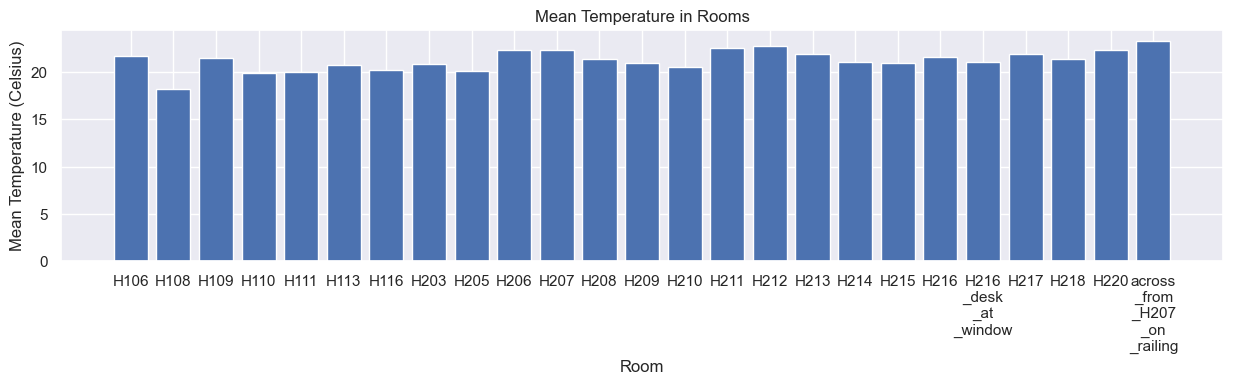

In [26]:
mean_temp_room = aggregated_data.groupby('room')['celsius'].mean().reset_index()
for i, col in mean_temp_room.iterrows():
    if len(col['room']) > 5:
        mean_temp_room.at[i, 'room'] = col['room'].replace('_', '\n_')
        
plt.figure(figsize=(15, 3))
plt.bar(mean_temp_room['room'], mean_temp_room['celsius'])
plt.title('Mean Temperature in Rooms')
plt.xlabel('Room')
plt.ylabel('Mean Temperature (Celsius)')
plt.show()

## 3.0 Create different table aggregations to check for "Simposons Paradox"
Hints: 
* Find an appropriate aggregation of which you think, it could generate a paradox. E.g. compare an aggregation of multiple rooms with a single rooom.
* Rooms with a '0' in the middle are on one side of the building, with a '1' on another.
* There are also errorneous values in the data, that you might want to remove first.
* Consider different time spans. During the winter period, many rooms a heated. During summer, the room temperatures are more influenced by the outside environmental conditions

Let's prepare our dataframe to check for the Simpson's paradox. We want to check and show, if the trend appears in different groups of data but disappears or reverses when these groups are combined. For that reason we want to look at the seasonal differencies and location differencies

In [69]:
simpsons_df = aggregated_data.copy()

simpsons_df['season'] = np.where(simpsons_df['datetime'].dt.month.isin([1, 2, 12, 11]), 'Winter', 'Summer')
simpsons_df['building_side'] = np.where(simpsons_df['room'].str[2] == '1', 'left-side', 'right-side')
all_mean = simpsons_df['celsius'].mean()
room_mean = simpsons_df.groupby('room')['celsius'].mean().reset_index()
season_mean = simpsons_df.groupby('season')['celsius'].mean().reset_index()
room_season_mean = simpsons_df.groupby(['room', 'season'])['celsius'].mean().reset_index()
building_side_mean = simpsons_df.groupby(['building_side', 'room'])['celsius'].mean().reset_index()

In [70]:
display(pd.DataFrame({'Overall mean temperature': [all_mean]}))

,Overall mean temperature
0,21.350531


As you can see, each room has its own average value and some of them are far from the overall value from above

In [71]:
room_mean.set_index('room', inplace=True)
print('Room mean temperature: ')
display(room_mean)

Room mean temperature: 


,celsius
room,
H106,21.702452
H108,18.232045
H109,21.538121
H110,19.889164
H111,20.042767
H113,20.725524
H116,20.211850
H203,20.861892
H205,20.096017


Average seasonal temperature also differs significantly, which proves the point of Simpson's paradox

In [72]:
season_mean.set_index('season', inplace=True)
print('Seasonal mean temperature: ')
display(season_mean)

Seasonal mean temperature: 


,celsius
season,
Summer,22.522300
Winter,19.515651


Another property to look at is that the temperature differs not only by the season, but also depending on the room. And after combining them both, we get a clear visual prove of Simpson's paradox, what couldn't be seen in the overall estimated values

In [73]:
room_season_mean.set_index('room', inplace=True)
print('Room + Season mean temperature: ')
display(room_season_mean)

Room + Season mean temperature: 


,season,celsius
room,,
H106,Summer,22.571761
H106,Winter,20.401698
H108,Summer,18.869397
H108,Winter,16.961466
H109,Summer,22.021590
H109,Winter,20.645435
H110,Summer,21.313682
H110,Winter,17.516007
H111,Summer,20.937018


We don't see any special differences between one or the other side of the building, as temperatures are stable and similar in both sides of the building

In [74]:
building_side_mean.set_index('room', inplace=True)
print('Building side mean: ')
display(building_side_mean)

Building side mean: 


,building_side,celsius
room,,
H110,left-side,19.889164
H111,left-side,20.042767
H113,left-side,20.725524
H116,left-side,20.211850
H210,left-side,20.516762
H211,left-side,22.600070
H212,left-side,22.792584
H213,left-side,21.965812
H214,left-side,21.139245


## 3.1 Create a graph over time
Use the line or scatter graphs to check for simpsons paradox.
What is the difference in the perception of the data when using line graphs compared to scatter graphs? Think about missing data!

The following is the temperature development throughout the entire time. As you can see, we can't see any specific trend of the temperature change in a particular room

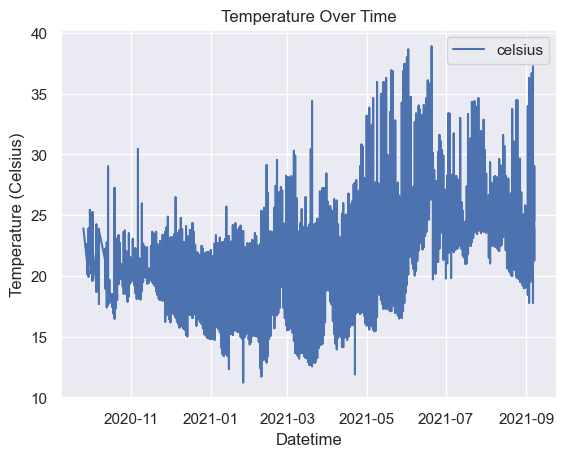

In [75]:
simpsons_df.plot(x='date', y='celsius', kind='line', title='Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (Celsius)')
plt.show()

Here you can see a scatter matrix of `temperature`, `humidity` and `pressure` and their relationship to each other

C:\Users\tadno\AppData\Local\Temp\ipykernel_21376\11916610.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



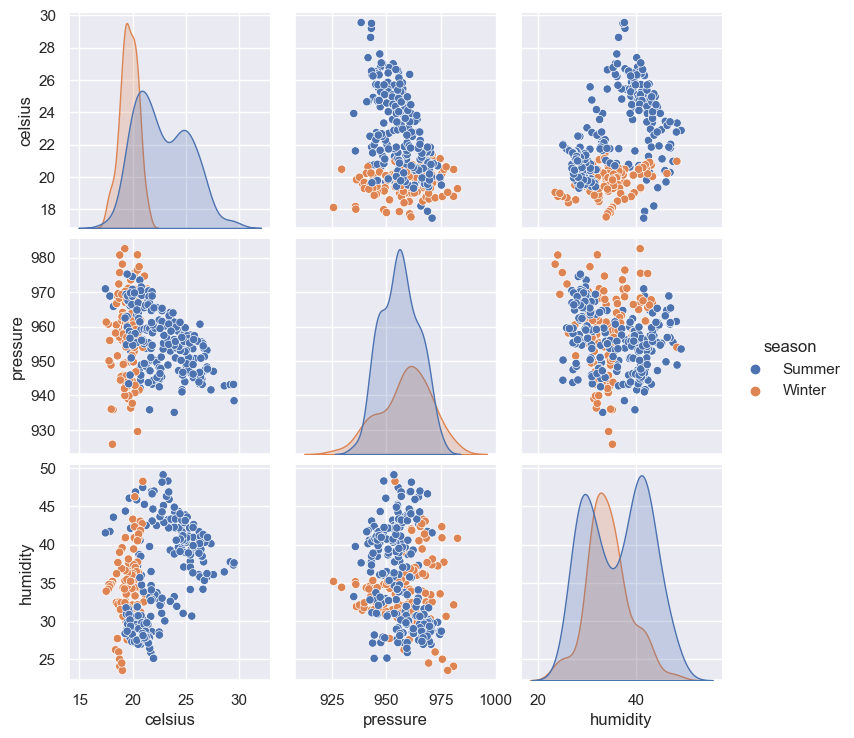

In [79]:
graph_over_time_season = simpsons_df.groupby(['date', 'season']).mean().reset_index()
sns.pairplot(data=graph_over_time_season, hue='season')
plt.show()

As you can see there is not a big difference in temperatures in either side of the building

C:\Users\tadno\AppData\Local\Temp\ipykernel_21376\2244063662.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



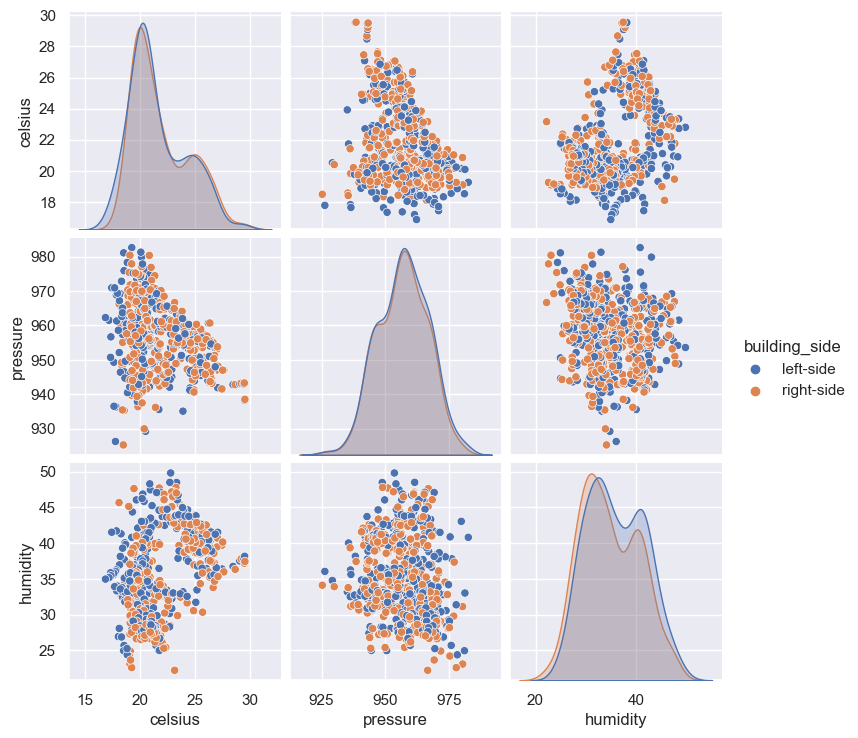

In [80]:
graph_over_time_location = simpsons_df.groupby(['date', 'building_side']).mean().reset_index()
sns.pairplot(data=graph_over_time_location, hue='building_side')
plt.show()

## 3.2 Create a 2D and 3D scatterplot for the environmental data

In [81]:
fig_2d = px.scatter(graph_over_time_season, x='date', y='celsius', color='season', title='2D Scatter Plot')
fig_2d.show()

In [82]:
fig_3d = px.scatter_3d(graph_over_time_season, x='date', y='celsius', z='humidity', color='season', title='3D Scatter Plot')
fig_3d.show()